# **Проверка знаний**

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [63]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками
from sklearn import preprocessing # для нормализации, стандартизации

In [64]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

In [66]:
# Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола.
# trestbps — систолическое артериальное давление в состоянии покоя.
# Информацию о среднем давлении для возраста и пола возьмите из этой таблицы.
# В таблице систолическое давление написано первым, перед дробной чертой.

def get_trestbps_mean(sex, age):
    pressure = [
        [116, 120, 127, 137, 144, 159],
        [123, 126, 129, 135, 142, 142]
    ]

    if age < 21:
        return pressure[int(sex)][0]
    elif age >= 61:
        return pressure[int(sex)][5]
    else:
        return pressure[int(sex)][int((age - 1) // 10 - 1)]


heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['sex'], row['age']), axis=1)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [67]:
display(heart.head())
heart.loc[300]['trestbps_mean']
heart.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [68]:
# Проанализируйте датасет и выберите категориальные признаки
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in heart.columns:
    # создаём кортеж (имя столбца, число уникальных значений, тип данных)
    item = (col, heart[col].nunique(),heart[col].dtype) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)
heart.info()

,Column_Name,Num_Unique,Type
0,sex,2,int64
1,fbs,2,int64
2,exang,2,int64
3,target,2,int64
4,old,2,int64
5,restecg,3,int64
6,slope,3,int64
7,cp,4,int64
8,thal,4,int64
9,ca,5,int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


In [69]:
# Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков.

encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)
encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart = pd.concat([heart, type_bin], axis=1)
encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)
encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)
encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

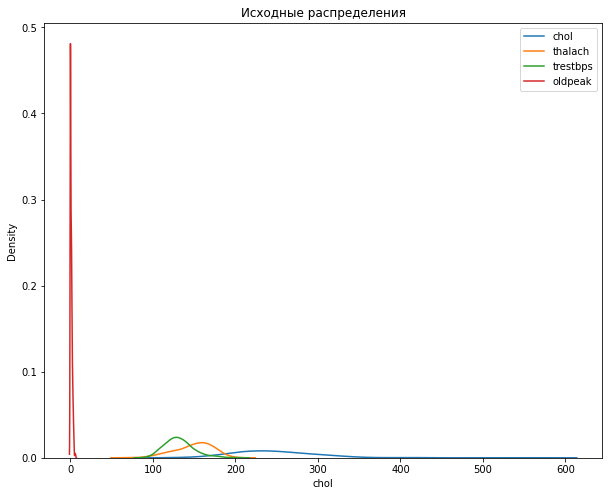

In [70]:
# Нормализуйте все числовые признаки подходящим способом.
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend();
heart.info()

In [60]:
# продолжение

heart_num = heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
heart_name = heart_num.columns
scaler_r = preprocessing.RobustScaler()
heart = scaler_r.fit_transform(heart_num)
heart = pd.DataFrame(heart, columns=heart_name)
heart.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.672748,0.876907,0.816232,0.704774,0.725672
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.629630,3.500000,5.102362,1.507692,3.375000


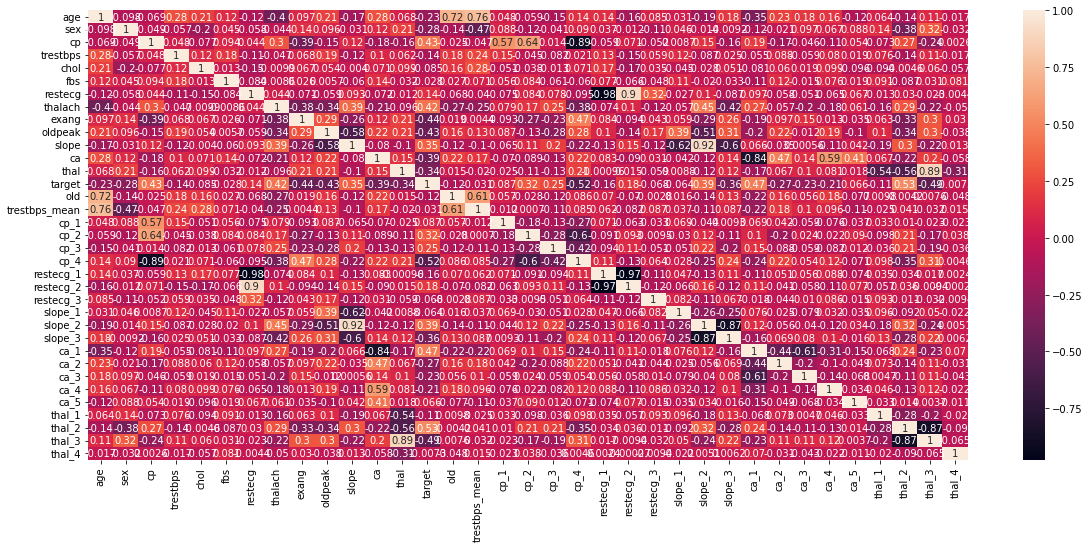

In [77]:
# Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.
fig, ax = plt.subplots(figsize=(19.7, 8.27))
sns.heatmap(heart.corr(), annot=True, ax=ax); # включаем отображение коэффициентов